In [1]:

import numpy as np
from Function import create_adjacency_matrices,evolve_2d_graph,coherent_state, Gaussian_initial_state,localized_initial_state,superposition_initial_state
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import timeit
import networkx as nx
import matplotlib.pyplot as plt
from numpy.linalg import norm


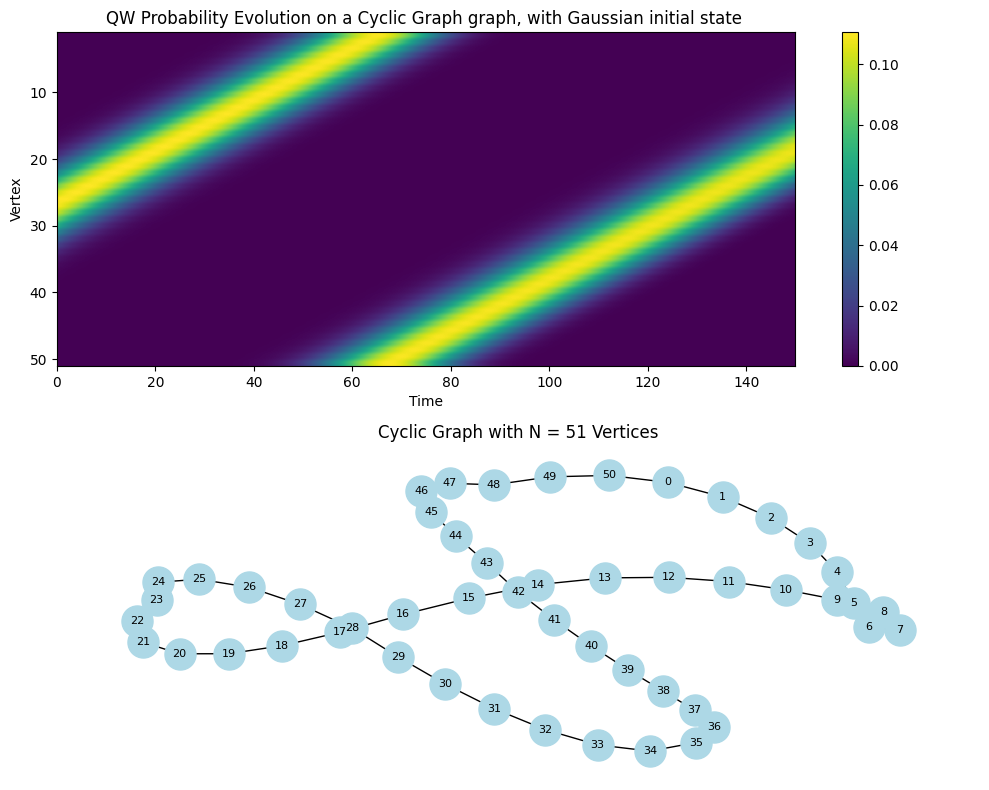

In [2]:
def QW(N,initial_state_type,graph_type):


    # Create the initial state vector based on the type selected            
    if initial_state_type == "Localized":
       ps_0 = localized_initial_state(N,0)
    elif initial_state_type == "Superposition":                    
       ps_0 = superposition_initial_state(N,N//4,N//2)

    elif initial_state_type == "Gaussian":
       ps_0 = Gaussian_initial_state(N,N/2,N/10)
    elif initial_state_type == "Coherent":

       alpha = 1.0 + 1.0j  # Coherent state amplitude
       ps_0= coherent_state(alpha,N)

    else:
        raise ValueError("Invalid initial state type.")
    
    H, _ = create_adjacency_matrices(N, graph_type)
    _,G= create_adjacency_matrices(N, graph_type)
    t = np.linspace(0, 30, 1000)

    data = evolve_2d_graph(H, ps_0, t)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  # Two subplots in a vertical layout
    cmap = cm.viridis 
    fig.subplots_adjust(hspace=0.5)
    norms = mcolors.Normalize(vmin=data.min(), vmax=data.max())
    ax1.imshow(data, cmap=cmap,norm=norms ,  aspect='auto', extent=[0, 150, N, 1])
    fig.colorbar(cm.ScalarMappable(norm=norms, cmap=cmap), ax=ax1)
    ax1.set_title(f'QW Probability Evolution on a {graph_type} graph, with {initial_state_type} initial state ')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Vertex')


    nx.draw(G, with_labels=True, node_size=500, node_color="lightblue", font_size=8)
    ax2.set_title(f'{graph_type} with N = {N} Vertices')
    plt.tight_layout()

QW(51, "Gaussian", "Cyclic Graph")





